# ★ Compression ★

# 11.1 The Discrete Cosine Transform

In [1]:
import numpy as np
import cv2
from urllib.request import urlopen
from matplotlib import pyplot as plt
from scipy.fftpack import dct

np.set_printoptions(precision=4)

## One-dimensional Discrete Cosine Transform

$C_{ij} = \frac{\sqrt{2}}{\sqrt{n}}\cos{\frac{i(2j+1)\pi}{2n}}$

for $i,j=0.\cdots,n-1$ where

$a_i \equiv \left\{\begin{matrix}
1/\sqrt{2} & \text{if } i = 0 \\ 
1 & \text{if } i = 1,\cdots,n-1 
\end{matrix}\right.$

or

$C = \sqrt{\frac{2}{n}}\begin{bmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & \cdots & \frac{1}{\sqrt{2}}\\ 
\cos{\frac{\pi}{2n}} & \cos{\frac{3\pi}{2n}} & \cdots & \cos{\frac{(2n-1)\pi}{2n}}\\ 
\cos{\frac{2\pi}{2n}} & \cos{\frac{6\pi}{2n}} & \cdots & \cos{\frac{2(2n-1)\pi}{2n}}\\
\vdots & \vdots &  & \vdots \\
\cos{\frac{(n-1)\pi}{2n}} & \cos{\frac{(n-1)3\pi}{2n}} & \cdots & \cos{\frac{(n-1)(2n-1)\pi}{2n}}
\end{bmatrix}$

In [2]:
def generate_dct_matrix(n):
    C = np.ones((n, n)) * (1/np.sqrt(2))
    for i in range(1, n):
        for j in range(n):
            C[i, j] = np.cos( (np.pi * i + i * j * 2 * np.pi) / (2 * n) )
    C *= np.sqrt(2 / n)
    return C

## Definition

The Discrete Cosine Transform (DCT) of 
$x = [x_0,\cdots,x_{n-1}]^T$ 
is the n-dimensional vector 
$y = [y_0,\cdots,y_{n-1}]^T$, 
where $y = Cx$

$C^{-1} = C^T = \sqrt{\frac{2}{n}}\begin{bmatrix}
\frac{1}{\sqrt{2}} & \cos{\frac{\pi}{2n}} & \cdots & \cos{\frac{(n-1)\pi}{2n}} \\ 
\frac{1}{\sqrt{2}} & \cos{\frac{3\pi}{2n}} & \cdots & \cos{\frac{(n-1)3\pi}{2n}}\\ 
\vdots & \vdots &  & \vdots \\
\frac{1}{\sqrt{2}} & \cos{\frac{2(n-1)\pi}{2n}} & \cdots & \cos{\frac{(n-1)(2n-1)\pi}{2n}}
\end{bmatrix}$

## DCT Interpolation Theorem

Let $x = [x_0,\cdots,x_{n-1}]^T$ be a vector of n real numbers
Define $y = [y_0,\cdots,y_{n-1}]^T = Cx$, where C is the Discrete Cosine Transform matrix of order n. Then the real function

$P_n(t) = \frac{1}{\sqrt{n}}y_0 + \frac{\sqrt{2}}{\sqrt{n}}\sum_{k=1}^{n-1}\cos{\frac{k(2t+1)\pi}{2n}}$

satisfies $P_n(j) = x_j$ for $j = 0,\cdots,n-1$

In [3]:
def dct_interpolation(ys, ts):
    n = ys.size
    P = lambda t, n, ys : ys[0] / np.sqrt(n) + np.sqrt(2 / n) * \
        np.sum([ys[k] * np.cos(k * (2 * t + 1) * np.pi / (2 * n)) for k in range(1, n)])
    Ps = np.empty(ts.size)
    for i in range(ts.size):
        Ps[i] = P(ts[i], n, ys)
    return Ps

## Example 

Use the DCT to interpolate the points (0,1), (1,0), (2,-1), (3,0)

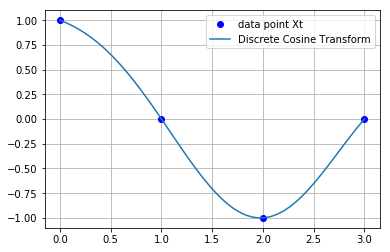

In [4]:
x = np.array([1, 0, -1, 0]).T
t = np.arange(0, 4)
C = generate_dct_matrix(4)
y = np.matmul(C, x)

ts = np.linspace(0, 3, 50)
Ps = dct_interpolation(y, ts)

plt.plot(t, x, 'bo', label = 'data point Xt')
plt.plot(ts, Ps, label = 'Discrete Cosine Transform')
plt.legend()
plt.grid(True)
plt.show()

or use **scipy.fftpack.dct**

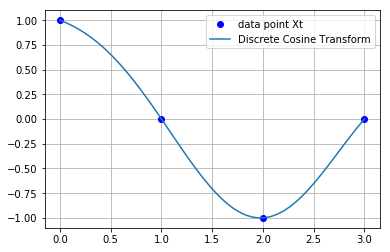

In [5]:
x = np.array([1, 0, -1, 0]).T
t = np.arange(0, 4)
y = dct(x, norm='ortho')

ts = np.linspace(0, 3, 50)
Ps = dct_interpolation(y, ts)

plt.plot(t, x, 'bo', label = 'data point Xt')
plt.plot(ts, Ps, label = 'Discrete Cosine Transform')
plt.legend()
plt.grid(True)
plt.show()

## DCT Least Squares Approximation Theorem

Let $x = [x_0,\cdots,x_{n-1}]^T$ be a vector of n real numbers.
Define $y = [y_0,\cdots,y_{n-1}]^T = Cx$, where C is the Discrete Cosine Transform matrix.
Then, for any positive integer $m \le n$, the choice of coefficients $y_0,\cdots,y_{m-1}$ in

$P_m(t)=\frac{1}{\sqrt{n}}y_0+\frac{\sqrt{2}}{\sqrt{n}}\sum_{k=1}^{m-1}y_k\cos{\frac{k(2t+1)\pi}{2n}}$

minimizes the squared approximation error $\sum_{j=0}^{n-1}(P_m(j) - x_j)^2$ of the n data points.

In [6]:
def dct_least_squares(ys, ts, m):
    n = ys.size
    P = lambda t, n, ys, m : ys[0] / np.sqrt(n) + np.sqrt(2 / n) * \
        np.sum([ys[k] * np.cos(k * (2 * t + 1) * np.pi / (2 * n)) for k in range(1, m)])
    Ps = np.empty(ts.size)
    for i in range(ts.size):
        Ps[i] = P(ts[i], n, ys, m)
    return Ps

## Example

Use the DCT and **DCT Least Squares Approximation Theorem** to find least squares fits to the data $t = 0,\cdots,7$ and $x = [-2.2,-2.8,-6.1,-3.9, 0.0, 1.1, -0.6, -1.1]^T$ for $m = 4, 6,\ and\ 8$

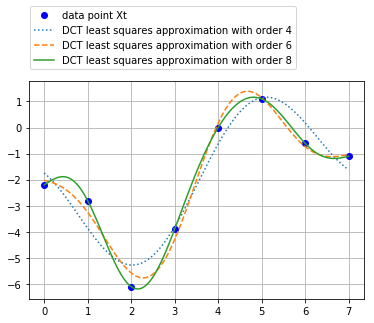

In [7]:
x = np.array([-2.2, -2.8, -6.1, -3.9, 0.0, 1.1, -0.6, -1.1]).T
m1, m2, m3 = 4, 6, 8
t = np.arange(0, 8)
C = generate_dct_matrix(8)
y = np.matmul(C, x)

ts = np.linspace(0, 7, 100)
Ps1 = dct_least_squares(y, ts, m1)
Ps2 = dct_least_squares(y, ts, m2)
Ps3 = dct_least_squares(y, ts, m3)

plt.plot(t, x, 'bo', label = 'data point Xt')
plt.plot(ts, Ps1, label = 'DCT least squares approximation with order 4', linestyle=':')
plt.plot(ts, Ps2, label = 'DCT least squares approximation with order 6', linestyle='--')
plt.plot(ts, Ps3, label = 'DCT least squares approximation with order 8')
plt.legend(bbox_to_anchor=(0, 1.05), loc=3, borderaxespad=0.1)
plt.grid(True)
plt.show()

## Two-Dimensional DCT And Image Compression

## Definition

The two-dimensional Discrete Cosine Transform (2D-DCT) of the $n \times n$ matrix $X$ is the matrix $Y = CXC^T$

## Example

Find the 2D Discrete Cosine Transform of the data and 

$X = \begin{bmatrix}
1 & 1 & 1 & 1 \\ 
1 & 0 & 0 & 1 \\ 
1 & 0 & 0 & 1 \\ 
1 & 1 & 1 & 1
\end{bmatrix}$

In [8]:
X = np.array([
    [1, 1, 1, 1],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [1, 1, 1, 1]
])
C = generate_dct_matrix(X.shape[0])
Y = np.matmul(C, np.matmul(X, C.T))
Y = np.round(Y, 4)
print(Y)

[[ 3.  0.  1. -0.]
 [ 0.  0.  0.  0.]
 [ 1.  0. -1. -0.]
 [-0.  0. -0.  0.]]


## Definition

The inverse two-dimension Discrete Cosine Transform of the $n \times n$ matrix Y is the matrix $X = C^TYC$

## 2D-DCT Interpolation Theorem

Let $X = (x_{ij})$ be a matrix of $n^2$ real numbers. Let $Y = (y_{kl})$ne the two-dimensional Discrete Cosine Transform of X. Define $a_0 = 1/\sqrt{2}$ and $a_k = 1$ for $k > 0$. Then the real function

$P_n(s,t) = \frac{2}{n}\sum_{k=0}^{n-1}\sum_{l=0}^{n-1}y_{kl}a_ka_l\cos{\frac{k(2s+1)\pi}{2n}\frac{l(2t+1)\pi}{2n}}$

satisfies $P_n(i,j) = x_{ij}$ for $i,j = 0,\cdots,n-1$

In [9]:
def two_dim_dct_interpolation(Y, s, t):
    val = 0
    n = Y.shape[0]
    for k in range(n):
        for l in range(n):
            ak = 1 if k > 0 else (1 / np.sqrt(2))
            al = 1 if l > 0 else (1 / np.sqrt(2))
            val += Y[k,l] * ak * al \
                * np.cos(k * (2 * s + 1) * np.pi / (2 * n)) \
                * np.cos(l * (2 * t + 1) * np.pi / (2 * n))
    return 2 * val / n

## Image compression

(512, 512)


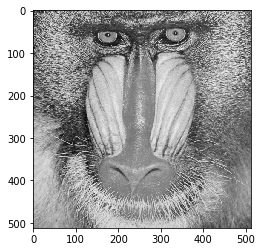

In [10]:
with urlopen('https://i.imgur.com/bRpvP3A.png') as url:
    resp = url.read()
    image = np.asarray(bytearray(resp), dtype = np.uint8)
    image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
    print(image.shape)
    plt.imshow(image, cmap='gray')
    plt.show()

## Poor quality compressed image (crude method)

each $8 \times 8$ pixel block is replaced by its average pixel value

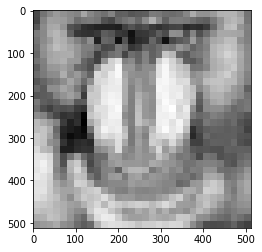

In [11]:
poor_quality_image = np.zeros(image.shape)
block_size = 16

# Do average for each (block_size x block_size) block
for i in range(0, poor_quality_image.shape[0], block_size):
    for j in range(0, poor_quality_image.shape[1], block_size):
        block = image[i:i+block_size, j:j+block_size]
        poor_quality_image[i:i+block_size, j:j+block_size] = block.mean()
    
plt.imshow(poor_quality_image, cmap='gray')
plt.show()

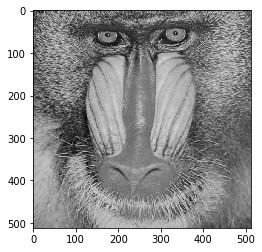

In [12]:
X = image.copy().astype(np.int16)
two_dim_dct_image = np.zeros(image.shape, dtype = np.int16)

# approximately centered around zero
X -= 128
C = generate_dct_matrix(two_dim_dct_image.shape[0])
Y = np.matmul(C, np.matmul(X, C.T))

# round to nearest integer for simplicity
Y = np.round(Y)

# create low-pass filter
lowpass_mask = np.empty(Y.shape)
for i in range(Y.shape[0]):
    for j in range(Y.shape[1]):
        lowpass_mask[i, j] = 1 if i + j <= Y.shape[0] - 1 else 0
        
# process with low-pass filter
Y = Y * lowpass_mask

# reconstruct the image
two_dim_dct_image = np.matmul(C.T, np.matmul(Y, C))
two_dim_dct_image +=  128

# Show image
plt.imshow(two_dim_dct_image.astype(np.uint8), cmap='gray')
plt.show()

## Quantization

## Quantization modulo q

- Quantization : $z = round(\frac{y}{q})$
- Dequantization : $\bar{y} = qz$

## Linear quantization

$q_{kl} = 8p(k+l+1)$ for $0 \le k,l \le 7$

for some constant $p$, called the **loss parameter**

In [13]:
def linear_quantization(p, m, n):
    Q = np.empty((m, n))
    for k in range(m):
        for l in range(n):
            Q[k,l] = 8 * p * (k + l + 1)
    return Q

The matrix <br/><br/>
$Q_y = p
\begin{bmatrix}
16 & 11 & 10 & 16 & 24 & 40 & 51 & 61 \\ 
12 & 12 & 14 & 19 & 26 & 58 & 60 & 55 \\ 
14 & 13 & 16 & 24 & 40 & 57 & 69 & 56 \\ 
14 & 17 & 22 & 29 & 51 & 87 & 80 & 62 \\ 
18 & 22 & 37 & 56 & 68 & 109 & 103 & 77 \\ 
24 & 35 & 55 & 64 & 81 & 104 & 113 & 92 \\ 
49 & 64 & 78 & 87 & 103 & 121 & 120 & 101 \\ 
72 & 92 & 95 & 98 & 112 & 100 & 103 & 99
\end{bmatrix}$ <br/><br/>
is widely used in currently distributed JPEG encoders (subscript y luminance Y = 0.299R + 0.587G + 0.114B)

In [14]:
Qy = np.array([
    [16, 11, 10, 16, 24,  40,   51,  61],
    [12, 12, 14, 19, 26,  58,   60,  55],
    [14, 13, 16, 24, 40,  57,   69,  56],
    [14, 17, 16, 24, 40,  57,   69,  56],
    [18, 22, 37, 56, 68, 109,  103,  77],
    [24, 35, 55, 64, 81, 104,  113,  92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103,  99],
])

$Q_c =
\begin{bmatrix}
17 & 18 & 24 & 47 & 99 & 99 & 99 & 99 \\ 
18 & 21 & 26 & 66 & 99 & 99 & 99 & 99 \\ 
24 & 26 & 56 & 99 & 99 & 99 & 99 & 99 \\ 
47 & 66 & 99 & 99 & 99 & 99 & 99 & 99 \\ 
99 & 99 & 99 & 99 & 99 & 99 & 99 & 99 \\ 
99 & 99 & 99 & 99 & 99 & 99 & 99 & 99 \\ 
99 & 99 & 99 & 99 & 99 & 99 & 99 & 99 \\ 
99 & 99 & 99 & 99 & 99 & 99 & 99 & 99
\end{bmatrix}$ <br/> <br/>

for the color differences U and V

In [15]:
Qc = np.array([
    [17, 18, 24, 47, 99, 99, 99, 99],
    [18, 21, 26, 66, 99, 99, 99, 99],
    [24, 26, 56, 99, 99, 99, 99, 99],
    [47, 66, 99, 99, 99, 99, 99, 99],
    [99, 99, 99, 99, 99, 99, 99, 99],
    [99, 99, 99, 99, 99, 99, 99, 99],
    [99, 99, 99, 99, 99, 99, 99, 99],
    [99, 99, 99, 99, 99, 99, 99, 99]
])

## Add quantization into image compression

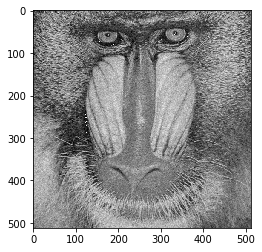

In [16]:
X = image.copy().astype(np.int16)
two_dim_dct_quantization_image = np.zeros(image.shape, dtype = np.int16)

# approximately centered around zero
Xd = X.astype(np.float64)
Xd -= 128

C = generate_dct_matrix(two_dim_dct_image.shape[0])
Y = np.matmul(C, np.matmul(Xd, C.T))

# quantization
quant_size = 8
Q = linear_quantization(1, quant_size, quant_size)
Yq = Y.copy()
for i in range(0, Y.shape[0], quant_size):
    for j in range(0, Y.shape[1], quant_size):
        block = Y[i:i+quant_size, j:j+quant_size]
        Yq[i:i+quant_size, j:j+quant_size] = np.round(block/Q)
        
# dequantization
for i in range(0, Y.shape[0], quant_size):
    for j in range(0, Y.shape[1], quant_size):
        block = Yq[i:i+quant_size, j:j+quant_size]
        Yq[i:i+quant_size, j:j+quant_size] = block * Q
        
# reconstruct the image
two_dim_dct_quantization_image = np.matmul(C.T, np.matmul(Yq, C))
two_dim_dct_quantization_image +=  128

# Show image
plt.imshow(two_dim_dct_quantization_image.astype(np.uint8), cmap='gray')
plt.show()

# 11.3 Huffman coding

## Definition

The **Shannon information**, or **Shannon entropy** of the string is $I = - \sum_{i=1}^{k}p_i\log_2{p_i}$

## Example 

Find the Shannon information of the string ABAACDAB

In [17]:
a = 4 / 8
b = 2 / 8
c = 1 / 8
d = 1 / 8
ps = np.array([a, b, c, d])
shannon = - np.sum([ps[i] * np.log2(ps[i]) for i in range(ps.size)]) # bits/symbol
print(shannon)

1.75


# 11.4 Modified DCT And Audio Compression

## Definition

The Discrete COsine Transform (version 4) (DCT4) of $x = (x_0,\cdots,x_{n-1})^T $ is the n-dimensional vector

$y = Ex$,

where E is  the $n \times n$ matrix

$E_{ij} = \sqrt{\frac{2}{n}}\cos{\frac{(i+\frac{1}{2})(j+\frac{1}{2})\pi}{n}}$

In [18]:
def dct_v4(n):
    E = np.empty((n, n))
    for i in range(n):
        for j in range(n):
            E[i, j] = np.cos((i + 0.5) * (j + 0.5) * np.pi / n)
    E *= np.sqrt(2/n)
    return E

## Lemma 

Denote by $c_j$ the jth column of the (extended) DCT4 matrix. Then 
- $c_j = c_{-1-j}$ for all integers j (the columns are symmetric around $j = - \frac{1}{2}$)
- $c_j = -c_{2n-1-j}$ for all integers j (the columns are antisymmetric around $j = n - \frac{1}{2}$)

## Definition

Let n be an even positive integer. The Modified Discrete Cosine Transform (MDCT) of $x = (x_0,\cdots,x_{2n-1})^T$ is the n-dimensional vector

$y = Mx$

where M is the $n \times 2n$ matrix

$M_{ij} = \sqrt{\frac{2}{n}}\cos{\frac{(i+\frac{1}{2})(j+\frac{n}{2}+\frac{1}{2})\pi}{n}}$

for $0 \le i \le n - 1$ and $0 \le j \le 2n - 1$

In [27]:
def mdct(n):
    E = np.empty((n, 2 * n))
    for i in range(n):
        for j in range(2 * n):
            E[i, j] = np.cos((i + 0.5) * (j + 0.5 + n / 2) * np.pi / n)
    E *= np.sqrt(2/n)
    return E

## Inversion of MDCT through overlapping

Let M be the $n \times 2n$ MDCT matrix, and $N = M^T$. Let $u_1,u_2,u_3$ be n-vectors, and set

$v_1 = M\begin{bmatrix}
u_1\\ 
u_2
\end{bmatrix}$ 

and

$v_2 = M\begin{bmatrix}
u_2\\ 
u_3
\end{bmatrix}$

Then the n-vectors $w_1,w_2,w_3,w_4$, defined by

$\begin{bmatrix}
w_1\\ 
w_2
\end{bmatrix} = Nv_1$

and

$\begin{bmatrix}
w_3\\ 
w_4
\end{bmatrix} = Nv_2$

satisfy $u_2 = \frac{1}{2}(w_2+w_3)$

## Example

Use the overlapped MDCT to transform the signal $x = [1,2,3,4,5,6]$. Then invert the transform to reconstruct the middle section $[3,4]$

In [52]:
M = mdct(2)
v1 = np.matmul(M, np.array([1,2,3,4]))
v2 = np.matmul(M, np.array([3,4,5,6]))
signal = np.vstack((v1, v2)).T
print('The transformed signal is : \n')
print(signal)

The transformed signal is : 

[[ -6.8498 -10.5454]
 [ -1.7549  -3.2856]]
